In [49]:
from google.colab import files
import sqlite3
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


connection_to_database = sqlite3.connect('events.sqlite')

sql_query = "SELECT * FROM events"
df = pd.read_sql_query(sql_query, connection_to_database)
connection_to_database.close()

df.head()

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session
0,2020-09-24 11:57:06 UTC,view,1996170,2144415922528452715,electronics.telephone,None,31.90,1515915625519388267,LJuJVLEjPT
1,2020-09-24 11:57:26 UTC,view,139905,2144415926932472027,computers.components.cooler,zalman,17.16,1515915625519380411,tdicluNnRY
2,2020-09-24 11:57:27 UTC,view,215454,2144415927158964449,None,None,9.81,1515915625513238515,4TMArHtXQy
3,2020-09-24 11:57:33 UTC,view,635807,2144415923107266682,computers.peripherals.printer,pantum,113.81,1515915625519014356,aGFYrNgC08
4,2020-09-24 11:57:36 UTC,view,3658723,2144415921169498184,None,cameronsino,15.87,1515915625510743344,aa4mmk0kwQ


In [50]:
df.tail()

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session
885124,2021-02-28 23:55:01 UTC,view,953226,2144415927553229037,None,None,219.94,1515915625611023730,FRLqIttxKU
885125,2021-02-28 23:58:05 UTC,view,1715907,2144415927049912542,electronics.video.tv,starwind,80.03,1515915625611024014,g6WqPf50Ma
885126,2021-02-28 23:58:09 UTC,view,4170534,2144415939364389423,electronics.clocks,amazfit,64.92,1515915625611024020,xNIJBqZdkd
885127,2021-02-28 23:58:14 UTC,view,888273,2144415921932861531,electronics.telephone,None,10.16,1515915625611024030,9pCbKMIcSx
885128,2021-02-28 23:59:09 UTC,view,743182,2144415935631458761,construction.tools.soldering,kada,65.08,1515915625556087775,BejOXRngEW


In [51]:
df.shape

(885129, 9)

In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 885129 entries, 0 to 885128
Data columns (total 9 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   event_time     885129 non-null  object 
 1   event_type     885129 non-null  object 
 2   product_id     885129 non-null  int64  
 3   category_id    885129 non-null  int64  
 4   category_code  648910 non-null  object 
 5   brand          672765 non-null  object 
 6   price          885129 non-null  float64
 7   user_id        885129 non-null  int64  
 8   user_session   884964 non-null  object 
dtypes: float64(1), int64(3), object(5)
memory usage: 60.8+ MB


In [53]:
df.dtypes

event_time        object
event_type        object
product_id         int64
category_id        int64
category_code     object
brand             object
price            float64
user_id            int64
user_session      object
dtype: object

In [54]:
df.describe()

,product_id,category_id,price,user_id
count,8.851290e+05,8.851290e+05,885129.000000,8.851290e+05
mean,1.906621e+06,2.144423e+18,146.328713,1.515916e+18
std,1.458708e+06,6.165105e+14,296.807683,3.554165e+07
min,1.020000e+02,2.144416e+18,0.220000,1.515916e+18
25%,6.988030e+05,2.144416e+18,26.460000,1.515916e+18
50%,1.452883e+06,2.144416e+18,65.710000,1.515916e+18
75%,3.721194e+06,2.144416e+18,190.490000,1.515916e+18
max,4.183880e+06,2.227847e+18,64771.060000,1.515916e+18


In [55]:
number_type_columns = ['product_id','category_id','price', 'user_id']
df[number_type_columns].describe()



,product_id,category_id,price,user_id
count,8.851290e+05,8.851290e+05,885129.000000,8.851290e+05
mean,1.906621e+06,2.144423e+18,146.328713,1.515916e+18
std,1.458708e+06,6.165105e+14,296.807683,3.554165e+07
min,1.020000e+02,2.144416e+18,0.220000,1.515916e+18
25%,6.988030e+05,2.144416e+18,26.460000,1.515916e+18
50%,1.452883e+06,2.144416e+18,65.710000,1.515916e+18
75%,3.721194e+06,2.144416e+18,190.490000,1.515916e+18
max,4.183880e+06,2.227847e+18,64771.060000,1.515916e+18


In [56]:
len(df.drop_duplicates()) - len(df)

-655

In [57]:
df = df.drop_duplicates()

In [59]:
df.isna()

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session
0,False,False,False,False,False,True,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,True,True,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...
885124,False,False,False,False,True,True,False,False,False
885125,False,False,False,False,False,False,False,False,False
885126,False,False,False,False,False,False,False,False,False
885127,False,False,False,False,False,True,False,False,False


In [61]:
df.isnull().sum()

event_time            0
event_type            0
product_id            0
category_id           0
category_code    236047
brand            212232
price                 0
user_id               0
user_session        162
dtype: int64

In [63]:
df['brand'] =df['brand'].fillna('not specified')
df['user_session'] = df['user_session'].fillna('no data')
column_to_drop = 'category_code'
df = df.drop(columns=[column_to_drop])

In [88]:
df.sample(15)

,event_time,event_type,product_id,category_id,brand,price,user_id,user_session
52203,2020-10-06 10:14:37+00:00,view,628067,2144415935329468864,not specified,79.68,1515915625486486431,qHhi18SkRs
750459,2021-02-06 04:43:33+00:00,view,1785245,2144415925011480748,canon,43.11,1515915625601132566,n9LdWuKCUW
251644,2020-11-10 13:54:06+00:00,view,1023578,2144415922402623591,samsung,1083.87,1515915625537790182,z5vdCL1jOp
604681,2021-01-14 01:36:56+00:00,view,4078916,2144415922427789416,sapphire,415.54,1515915625563460081,Y7tAil2kRj
361151,2020-11-27 13:24:41+00:00,view,884451,2144415927049912542,lg,195.22,1515915625542682393,fBTo4CEJaF
441010,2020-12-14 10:34:35+00:00,view,1813108,2144415941092442716,hp,103.73,1515915625510782943,WvrVYhHODk
746315,2021-02-05 10:37:09+00:00,view,4170514,2144415926890528986,orient,15.03,1515915625600881415,bd9Gbdw939
301432,2020-11-17 17:27:39+00:00,view,264027,2144415925011480748,hp,94.62,1515915625540513758,pyhp5muZOu
839602,2021-02-20 15:49:16+00:00,view,1843522,2144415921169498184,not specified,15.08,1515915625607796836,3n6x0pFgI5
209025,2020-11-04 02:40:07+00:00,view,3658849,2144415921169498184,philips,17.94,1515915625534360505,WGQXiRl1fm


In [87]:
df['event_time'] = pd.to_datetime(df['event_time'], errors='coerce')
df['event_time'].info()

<class 'pandas.core.series.Series'>
Index: 884474 entries, 0 to 885128
Series name: event_time
Non-Null Count   Dtype              
--------------   -----              
884474 non-null  datetime64[ns, UTC]
dtypes: datetime64[ns, UTC](1)
memory usage: 13.5 MB


In [106]:
for column in df.columns:
    unique_values = df[column].nunique()
    print(f"In {column}, the number of unique values: {unique_values}")

In event_time, the number of unique values: 845041
In event_type, the number of unique values: 3
In product_id, the number of unique values: 53453
In category_id, the number of unique values: 718
In brand, the number of unique values: 1000
In price, the number of unique values: 12422
In user_id, the number of unique values: 407283
In user_session, the number of unique values: 490399


In [109]:
df['event_date'] = df['event_time'].dt.date
min_date, max_date = df['event_date'].min(), df['event_date'].max()
print(f"Min date: {min_date}, MAX date: {max_date}")

Min date: 2020-09-24, MAX date: 2021-02-28


In [110]:
df['event_type'].value_counts()

event_type
view        793099
cart         54032
purchase     37343
Name: count, dtype: int64

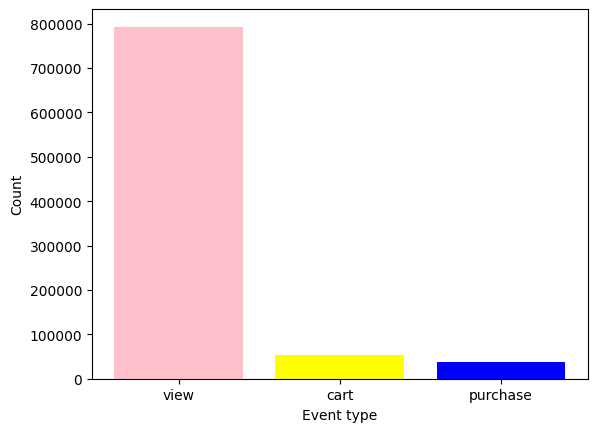

In [112]:
event_types = ['view', 'cart', 'purchase']
counts = [793099, 54032, 37343]
colors = ['pink', 'yellow', 'blue']
plt.xlabel('Event type')
plt.ylabel('Count')

plt.bar(event_types, counts, color=colors)
plt.show()

In [119]:
most_common_product_id = df['product_id'].value_counts().idxmax()
most_common_product_count = df['product_id'].value_counts().max()
print(f"Number 1 top product ID: {most_common_product_id} (count: {most_common_product_count})")

Number 1 top product ID: 1821813 (count: 14552)


In [120]:
df['category_id'].nunique()

718

In [121]:
three_lowest_prices = df['price'].nsmallest(3)
three_lowest_prices

262938    0.22
262939    0.22
262945    0.22
Name: price, dtype: float64

In [125]:
df['brand'].value_counts()

brand
not specified    212232
asus              27660
gigabyte          27652
msi               24864
palit             24787
                  ...  
elekta                1
vitesse               1
vitek                 1
docash                1
cipherlab             1
Name: count, Length: 1000, dtype: int64

In [126]:
unique_brands = df['brand'].unique()
unique_brands

array(['not specified', 'zalman', 'pantum', 'cameronsino', 'carver',
       'd-link', 'ritmix', 'ricoh', 'sony', 'kenwood', 'asrock',
       'pocketbook', 'blast', 'patriot', 'hynix', 'fit', 'panasonic',
       'eva', 'supermicro', 'sirius', 'rowenta', 'lg', 'flexis', 'amd',
       'fubag', 'epson', 'vlk', 'gigabyte', 'victorinox', 'logitech',
       'hp', 'jvc', 'zyxel', 'bosch', 'lomond', 'topon', 'swat', 'digma',
       'ubiquiti', 'jet', 'ippon', 'asus', 'smartbuy', 'scher-khan',
       'edifier', 'acv', 'pioneer', 'dell', 'lexmark', 'silverstone',
       'bbk', 'mystery', 'delta', 'canon', 'kelli', 'buro', 'hama',
       'brother', 'brand-rex', 'braun', 'hyundai', 'content', 'deepcool',
       'sandisk', 'samsung', 'seagate', 'pitatel', 'janome',
       'greenconnect', 'hi-black', 'perfeo', 'koowheel', 'palmexx',
       'alcatel', 'favourite', 'p.i.t.', 'kitfort', 'ural', 'bort',
       'nv-print', 'steelseries', 'uninet', 'xerox', 'zetton', 'beurer',
       'grandstream', 'keenet

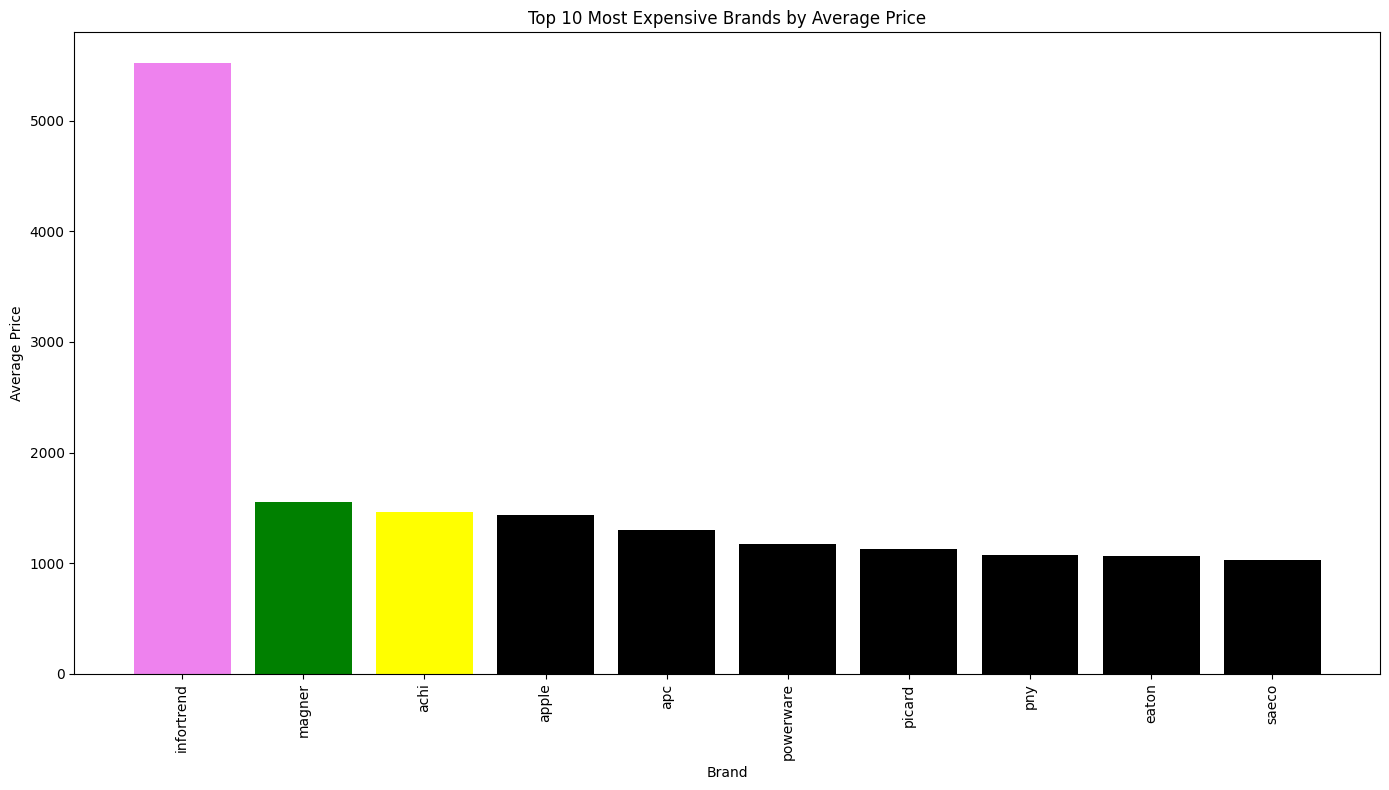

In [138]:
brand_price_df = df.groupby('brand')['price'].mean().reset_index()
top_10_brands = brand_price_df.sort_values(by='price', ascending=False).head(10)
colors = ['violet', 'green', 'yellow'] + ['black'] * 7
plt.figure(figsize=(14, 8))
plt.bar(top_10_brands['brand'], top_10_brands['price'], color=colors)
plt.xlabel('Brand')
plt.ylabel('Average Price')
plt.title('Top 10 Most Expensive Brands by Average Price')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()